Labo 5 ISD - Alexandre Jaquier et Valentin Kaelin

# 1. Régression linéaire simple

**1)** Installez la bibliothèque sklearn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from random import randrange, seed
from sklearn.preprocessing import MinMaxScaler

**2)** Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [2]:
boston_dataset = load_boston()
boston_frame = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_frame['MEDV'] = boston_dataset.target

boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3)** Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).  
Générez un histogramme de la distribution de la variable indépendente.

In [3]:
print(boston_frame.count())
print("-----------------------------------")
print(boston_frame.dropna().count())
print("-----------------------------------")
print(boston_frame.isnull().sum())

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [4]:
print(boston_frame.columns)
print(len(boston_frame.columns))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
14


Text(0, 0.5, 'Numbers of owner-occupied homes')

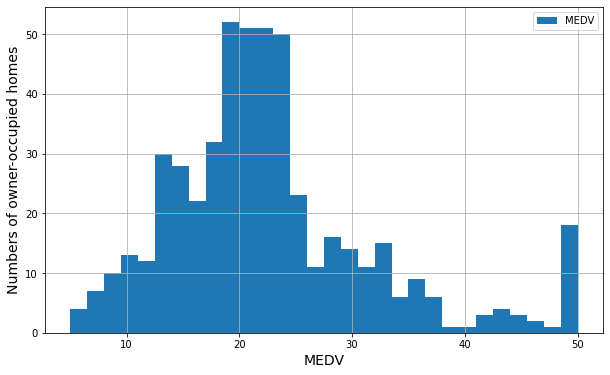

In [5]:
#print(boston_frame['MEDV'])
plot = pd.plotting.hist_series(boston_frame['MEDV'], legend=True, figsize=(10, 6), bins=30)
plot.set_title('', fontsize=15)
plot.set_xlabel('MEDV', fontsize=14)
plot.set_ylabel('Numbers of owner-occupied homes', fontsize=14)
#plot.set_yscale('log')

**4)** Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.  
Commentez vos observations.

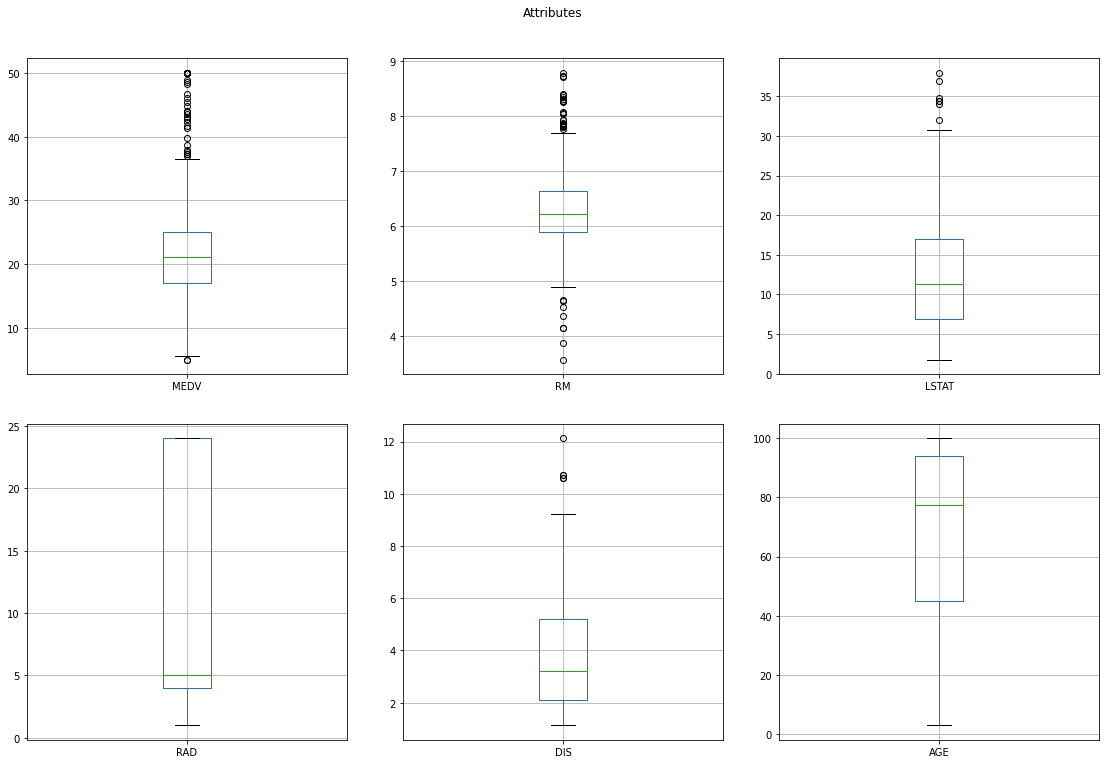

In [6]:
labels_to_show = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
columns_to_show = boston_frame[labels_to_show].columns

fig, axes = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(16, 16))
for col in range(9):
    if(col < len(columns_to_show)):
        boston_frame.boxplot(columns_to_show[col], ax=axes[col // 3, col % 3])
    else:
        fig.delaxes(axes[col // 3, col % 3])
    
fig.suptitle('Attributes')
plt.tight_layout(pad=3)

On observe que certains attributs sont mieux répartis que d'autres. L'attribut RAD par exemple n'est pas très utile.  
Certains attributs comme MEDV ou RM possèdent de nombreux outliers.

**5)** Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT,
chaque fois utilisant seulement une des variables.  

Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer
la performance moyenne du modèle.

Commentez vos résultats.

In [7]:
min_max = MinMaxScaler()
cols = boston_frame.columns.tolist()
scaled_df = min_max.fit_transform(boston_frame.values)
normalized_boston_df = pd.DataFrame(scaled_df,columns=cols)

In [8]:
seed(42)

def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

def compute_MSE(b, m, data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def compute_pearson_coeff(predictions, ground_truth):
    sum_above = 0
    sum_below = 0
    mean = np.mean(predictions)
    
    for i in range(len(predictions)):
        sum_above += pow(ground_truth[i] - predictions[i], 2)
        sum_below += pow(ground_truth[i] - mean, 2)
    score = 1 - (sum_above / sum_below)
    return score

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]


linear_regression_attributes = ['RM', 'RAD', 'LSTAT']
index_medv = boston_frame.columns.get_loc('MEDV')
n_splits = 100

results_by_attributes = {}
for attr in linear_regression_attributes:
    results_by_attributes[attr] = {'b': [], 'm': [], 'e': [], 'r': []}
    
print(results_by_attributes)

#Step 2: On choisit les hyperparamètres
# TODO: trouver des params moins éclatax
hyper_params_by_attributes = {
    'RM': {
        'num_epochs': 50,
        'learning_rate': 1,
    },
    'RAD': {
        'num_epochs': 100,
        'learning_rate': 1,
    },
    'LSTAT': {
        'num_epochs': 100,
        'learning_rate': 1,
    }
}

print(hyper_params_by_attributes)

for attr in linear_regression_attributes:
    print(attr)
    num_epochs = hyper_params_by_attributes[attr]['num_epochs']
    learning_rate = hyper_params_by_attributes[attr]['learning_rate']

    #data = np.array([[i[boston_frame.columns.get_loc(attr)], i[index_medv]] for i in boston_frame.values.tolist()])
    data = normalized_boston_df[[attr, 'MEDV']].to_numpy()
    
    for i in range(n_splits):
        boston_train_validation, boston_test,  = train_test_split(data, 0.8)
        
        boston_test = pd.DataFrame(boston_test).to_numpy()
        boston_train_validation = pd.DataFrame(boston_train_validation).to_numpy()

        #Step 3: On initialise la valeur de m et de b
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        #Step 4: On applique la méthode du gradient descendant
        #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, data)))
        [b, m] = gradient_descent(data, initial_b, initial_m, learning_rate, num_epochs)
        
        predictions = []
        for x in boston_test[:, 0]:
            predictions.append(m * x + b)
        
        ground_truth = boston_test[:, 1]
        
        results_by_attributes[attr]['b'].append(b)
        results_by_attributes[attr]['m'].append(m)
        results_by_attributes[attr]['e'].append(compute_MSE(b, m, data))
        results_by_attributes[attr]['r'].append(compute_pearson_coeff(predictions, ground_truth))
        print("After {0} epochs b = {1}, m = {2}, error = {3}, r2 = {4}".format(num_epochs, b, m, compute_MSE(b, m, data), compute_pearson_coeff(predictions, ground_truth)))

print('FINITO')

{'RM': {'b': [], 'm': [], 'e': [], 'r': []}, 'RAD': {'b': [], 'm': [], 'e': [], 'r': []}, 'LSTAT': {'b': [], 'm': [], 'e': [], 'r': []}}
{'RM': {'num_epochs': 50, 'learning_rate': 1}, 'RAD': {'num_epochs': 100, 'learning_rate': 1}, 'LSTAT': {'num_epochs': 100, 'learning_rate': 1}}
RM
After 50 epochs b = [0.01962369], m = [0.71389238], error = [0.02365033], r2 = [0.41131372]
After 50 epochs b = [0.10391035], m = [0.55467225], error = [0.02608497], r2 = [0.28212372]
After 50 epochs b = [0.02481534], m = [0.7040852], error = [0.0237737], r2 = [0.49094641]
After 50 epochs b = [0.09056406], m = [0.57988381], error = [0.02563815], r2 = [0.46700986]
After 50 epochs b = [0.00392349], m = [0.74355055], error = [0.02329847], r2 = [0.37322097]
After 50 epochs b = [-0.05407111], m = [0.85310418], error = [0.02227547], r2 = [0.46287277]
After 50 epochs b = [-0.04100212], m = [0.82841645], error = [0.02246798], r2 = [0.6064688]
After 50 epochs b = [0.03131383], m = [0.69180936], error = [0.02393305]

After 50 epochs b = [-0.03241511], m = [0.81219531], error = [0.02260652], r2 = [0.39022006]
After 50 epochs b = [0.04649833], m = [0.66312536], error = [0.02432671], r2 = [0.33414069]
After 50 epochs b = [0.07379863], m = [0.61155422], error = [0.02510956], r2 = [0.49892759]
After 50 epochs b = [-0.01496488], m = [0.77923129], error = [0.02291746], r2 = [0.40532286]
After 50 epochs b = [0.02618274], m = [0.70150213], error = [0.02380678], r2 = [0.52060809]
After 50 epochs b = [0.05506406], m = [0.64694441], error = [0.02456194], r2 = [0.40701575]
After 50 epochs b = [-0.11779265], m = [0.97347616], error = [0.02165364], r2 = [0.47883912]
After 50 epochs b = [-0.00747627], m = [0.76508505], error = [0.02306299], r2 = [0.40776252]
After 50 epochs b = [0.01959212], m = [0.71395202], error = [0.02364959], r2 = [0.47943947]
After 50 epochs b = [0.07646683], m = [0.60651391], error = [0.02519125], r2 = [0.31945996]
After 50 epochs b = [0.12480674], m = [0.51519831], error = [0.02683088], r2

After 100 epochs b = [0.46620034], m = [-0.20602561], error = [0.03561719], r2 = [0.1507025]
After 100 epochs b = [0.46619997], m = [-0.20602475], error = [0.03561719], r2 = [0.21941794]
After 100 epochs b = [0.46620002], m = [-0.20602486], error = [0.03561719], r2 = [0.12922688]
After 100 epochs b = [0.46620022], m = [-0.20602533], error = [0.03561719], r2 = [0.135691]
After 100 epochs b = [0.46620036], m = [-0.20602566], error = [0.03561719], r2 = [0.09744057]
After 100 epochs b = [0.46620051], m = [-0.206026], error = [0.03561719], r2 = [0.03771603]
After 100 epochs b = [0.46620015], m = [-0.20602515], error = [0.03561719], r2 = [0.18570016]
After 100 epochs b = [0.46620017], m = [-0.2060252], error = [0.03561719], r2 = [0.19522247]
After 100 epochs b = [0.46620039], m = [-0.20602573], error = [0.03561719], r2 = [0.11099287]
After 100 epochs b = [0.46620028], m = [-0.20602548], error = [0.03561719], r2 = [0.19736216]
After 100 epochs b = [0.46620017], m = [-0.2060252], error = [0.03

After 100 epochs b = [0.61325009], m = [-0.74277568], error = [0.01902332], r2 = [0.54176188]
After 100 epochs b = [0.60913493], m = [-0.72960614], error = [0.01905293], r2 = [0.47761837]
After 100 epochs b = [0.61156313], m = [-0.73737699], error = [0.01903383], r2 = [0.54631277]
After 100 epochs b = [0.60645387], m = [-0.7210261], error = [0.01907947], r2 = [0.59045619]
After 100 epochs b = [0.6099871], m = [-0.73233331], error = [0.01904569], r2 = [0.50669917]
After 100 epochs b = [0.60830498], m = [-0.7269501], error = [0.01906053], r2 = [0.54605135]
After 100 epochs b = [0.60629347], m = [-0.72051278], error = [0.01908124], r2 = [0.51947538]
After 100 epochs b = [0.61117228], m = [-0.73612618], error = [0.01903658], r2 = [0.51438841]
After 100 epochs b = [0.60734491], m = [-0.72387765], error = [0.01907001], r2 = [0.52917787]
After 100 epochs b = [0.61078454], m = [-0.73488532], error = [0.01903944], r2 = [0.58468147]
After 100 epochs b = [0.61363216], m = [-0.74399839], error = [

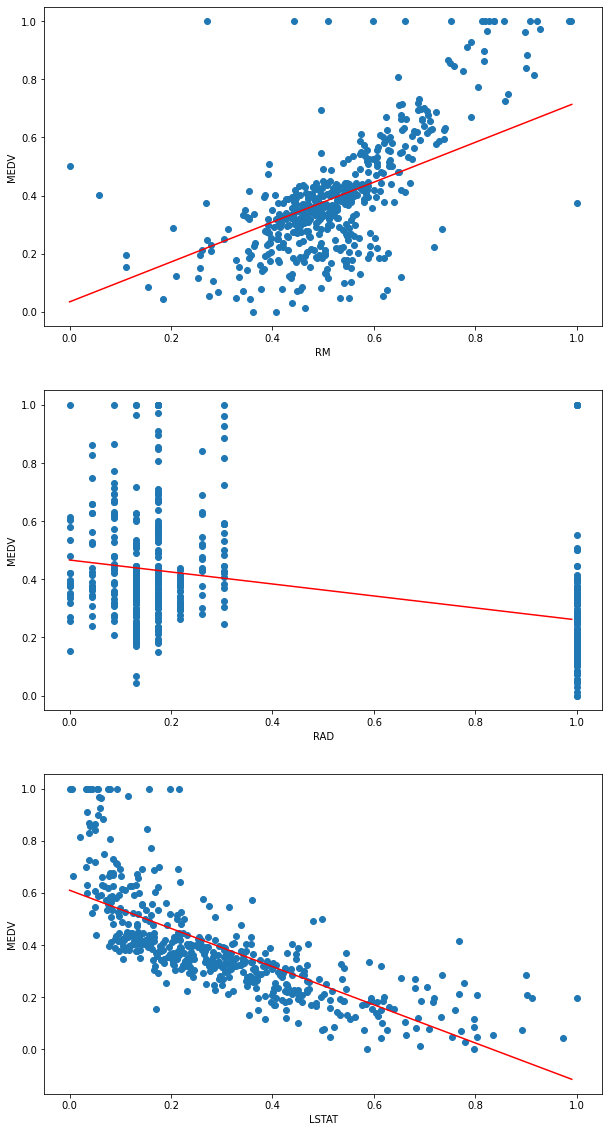

In [11]:
fig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))


for i in range(len(linear_regression_attributes)):
    attr = linear_regression_attributes[i]
    
    #print(results_by_attributes[attr]['b'])
    #print(results_by_attributes[attr]['m'])
    #print('----')
    
    mean_b = np.mean(results_by_attributes[attr]['b'])
    mean_m = np.mean(results_by_attributes[attr]['m'])
    mean_e = np.mean(results_by_attributes[attr]['e'])
    
    x_data = normalized_boston_df[attr]
    ax[i].scatter(x_data, normalized_boston_df['MEDV'])
    #x = np.arange(x_data.min(), x_data.max(), 0.5)
    x = np.arange(0, 1, 0.01)
    ax[i].plot(x, mean_m*x + mean_b, 'r')
    ax[i].set_xlabel(attr)
    ax[i].set_ylabel('MEDV')
    #ax[i].set_ylim([-100, 100])


In [12]:
mean_r = [np.mean(results_by_attributes[attr]['r']) for attr in linear_regression_attributes]

best_attr = max(mean_r)
index_best_attr = mean_r.index(best_attr)

print(*mean_r, sep="\n")
print(f'\nMeilleur attribut selon la moyenne du coefficient de détermination linéaire de Pearson (R2): {linear_regression_attributes[index_best_attr]}: {best_attr}')

0.4182783430591913
0.13033635881254854
0.5344538557801809

Meilleur attribut selon la moyenne du coefficient de détermination linéaire de Pearson (R2): LSTAT: 0.5344538557801809


On utilisera donc l'attribut **LSTAT** en combinaison de **MEDV** pour la suite des manipulations car il a les meilleurs résultats.

**6)** Explorez les hyper-paramètres : learning_rate et nombre d’epochs d’entraînement.
Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out.
Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. 

Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire.
(Note: la variable dépendante est MEDV).